# Cuaderno de Regresión

Con este cuaderno se estudiarán métodos de regresión empleando diferentes técnicas para calcular la regresión. También se eplearán modelos pre existentes en la librería scikit-learn
para analizar el dataset ice_cream_revenue

## Sección 1: Uso del algoritmo de mínimos cuadrados para encontrar un modelo
En la primera sección se emplearán modelos de regresión encontrados con el método de mínimos cuadrados que se basa en encontrar la solución óptima para un problema de la forma
$$ Ax=b $$ y puede ser resuelto con álgebra lineal.


In [49]:
import numpy as np
import matplotlib.pyplot as plt


### 1.1 Modelo lineal
Se trabajará con datos artificialmente generados. Creamos datos basados en la ecuación de una línea recta, luego agregamos ruido y graficamos los datos para tener una visualización de su comportamiento
El ruido que se agrega es de naturaleza Gaussiana, con media cero y desviación estándar de 0.75. Se crean 100 datos para efectos de una visualización adecuada

Text(0.5, 1.0, 'Dataset generado')

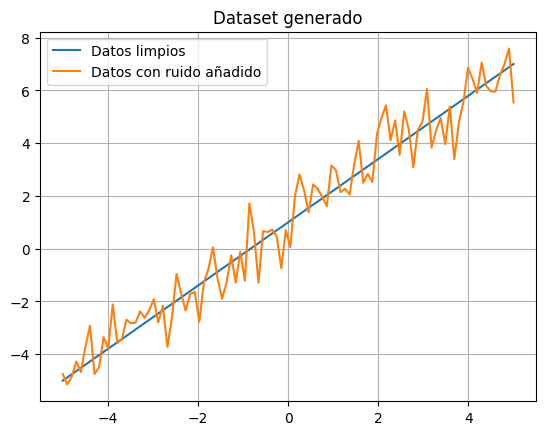

In [50]:
datos_x = np.linspace(-5, 5, 100) # 100 datos del 0 al 20
pendiente = 1.2
intersecto = 1
datos_y = datos_x * pendiente + intersecto

# agregar ruido a los datos
datos_y_ruido = np.random.normal(0,0.75,100) + datos_y
plt.plot(datos_x, datos_y)
plt.plot(datos_x, datos_y_ruido)
plt.legend(["Datos limpios", "Datos con ruido añadido"])
plt.grid()
plt.title("Dataset generado")

### 1.2 Creación del modelo
posteriormente se crea el modelo y las matrices para resolver el problema de optimización de la forma
$$
A\times x = b
$$

En donde, en la matriz $A$ se colocan los valores independientes (x) y una columna de unos para multiplicar la matriz de parámetros ( a encontrar) $b$. La solución del sistema se puede hallar con la pseudo inversa de Moore penrose, disponible en `numpy.linalg.pinv()`


In [51]:
A = np.array([datos_x, np.ones(len(datos_x))]).T
b = datos_y_ruido
parametros_b = np.linalg.pinv(A).dot(b)
print("Los parametros son: ", parametros_b)

Los parametros son:  [1.182941   1.05915517]


Text(0.5, 1.0, 'Modelo de regresión lineal')

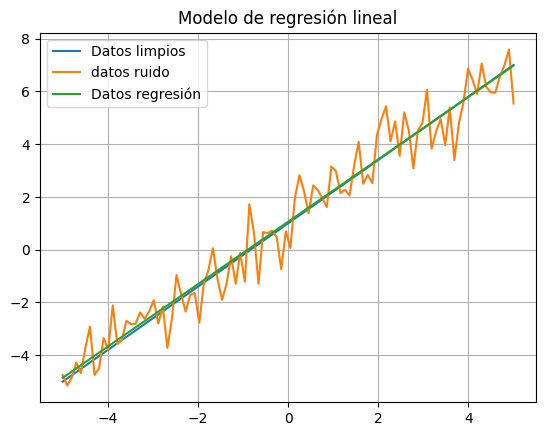

In [52]:
# A partir de los datos con ruido se puede crear un nuevo modelo que se ajuste minimizando el error cuadrático
plt.plot(datos_x, datos_y)
plt.plot(datos_x, datos_y_ruido)
plt.plot(datos_x, datos_x*parametros_b[0]+parametros_b[1])
plt.legend(["Datos limpios","datos ruido", "Datos regresión"])
plt.grid()
plt.title("Modelo de regresión lineal")

## Sección 2: Análisis y  Regresión del dataset Ice-cream-revenue
### 2.1 Análisis exploratorio de los datos

Se empleará el dataset ice-cream-revenue que tiene las columnas de temperatura y cantidad vendida de helados. Utilizando scikit-learn se crearán modelos de regresión. El dataset se preprocesará para poder tener datos de evaluación del modelo


In [53]:
import pandas as pd
import sklearn
import seaborn as sns


In [54]:
df_helados = pd.read_csv("IceCreamData.csv")
#df_helados.head()
df_helados

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [55]:
df_helados.info
df_helados.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [56]:
df_helados.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


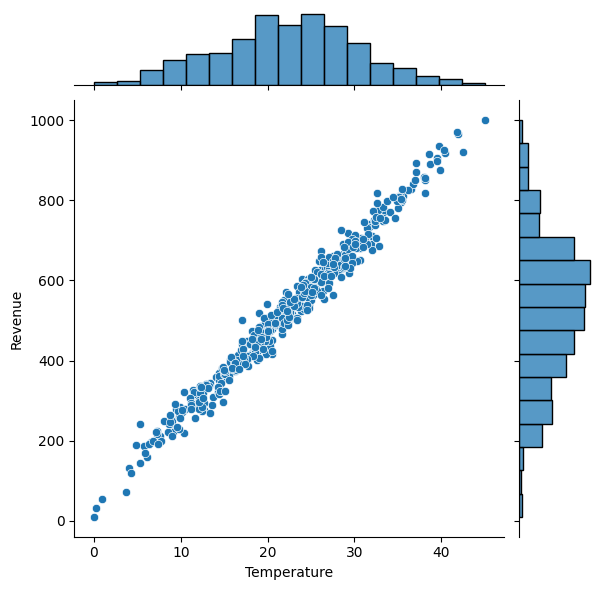

In [57]:
sns.jointplot(x="Temperature", y="Revenue", data=df_helados)

### 2.2 Preparando los datos
Particionando el dataset para la creación de modelos. Esto mediante la función `train_test_split` de scikit-learn


In [58]:
from sklearn.model_selection import train_test_split

# extrayendo la información del dataset
X = df_helados[["Temperature"]]
y = df_helados["Revenue"]

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(375, 1)


### 2.3 modelo de regresión lineal
Emplearemos el modelo `LinearRegression` de scikit-learn para ajustar los datos

In [59]:
from sklearn.linear_model import LinearRegression

# crear el modelo
regressor = LinearRegression(fit_intercept = True)
# entrenarlo con los datos
regressor.fit(X_train, y_train)

# el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")
m=regressor.coef_
b=regressor.intercept_
print(m,b)

La pendiente del modelo (B) es: [21.29479242], el intersecto (A) es 47.912436478851475
[21.29479242] 47.912436478851475


### 2.4 Evaluación del modelo

Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura')

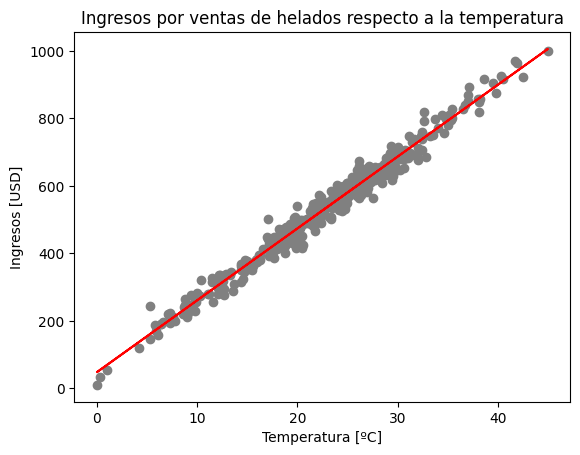

In [60]:
y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura')

Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura (test data)')

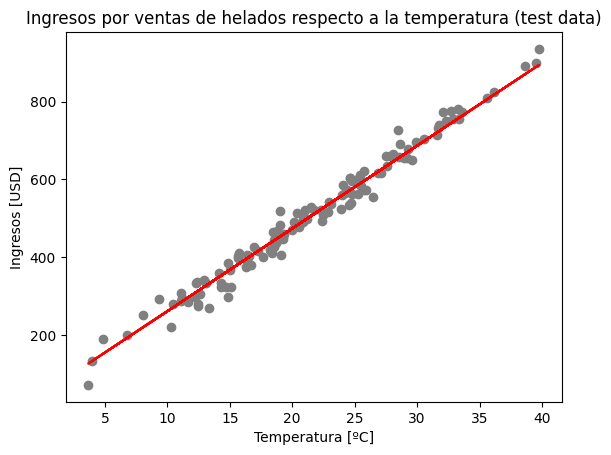

In [61]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura (test data)')



### Error medio cuadrático
Es una de las medidas más empleadas como función de pérdida en los algoritmos de regresión. Mide la distancia cuadrática entre una predicción del modelo respecto al dato correspondiente en el conjunto de datos para todos los puntos que tenga el conjunto de datos. Luego calcula el promedio de esas distancias.



In [62]:
# evaluando el comportamiento del modelo
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))
n = len(y_test) #numero de datos
print('El numero de datos es:',n)

print(type(y_test))
print(type(X_test))
y_test = pd.DataFrame(y_test) #Conversion de serie a DataFrame
#print(type(y_test))
#print(type(X_test))

sr = (np.array((np.array(y_test)-(m*np.array(X_test)+b))**2)).sum()/n #formula de Error cuadratico estandar
e_lineal=sr**0.5 #formula de error linela promedio
print('El Error cuadratico estandar mediante formula:',sr)
print('El error lineal promedio mediante formula:',e_lineal)
df_helados


Mean Squared Error: 612.2897944318775
Root Mean Squared Error: 24.74449018330904
El numero de datos es: 125
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
El Error cuadratico estandar mediante formula: 612.2897944318775
El error lineal promedio mediante formula: 24.74449018330904


,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [63]:
y_test = np.array(y_test)
y_pred = m*np.array(X_test)+b

def calcular_rmse(y_test, y_pred):
  rmse = np.sqrt(((y_test-y_pred)**2).sum()/n)
  return rmse

print("Root Mean Squared Error:",calcular_rmse(y_test, y_pred))

Root Mean Squared Error: 24.74449018330904


# Error medio absoluto
Es la diferencia entre los valores estimados y los reales. Se calcula el promedio de todas las diferencias para encontrar el valor del error


## Tarea:

Error cuadratico medio == mse (mean squared error)

```
# Error medio absoluto == mae (mean_absolute_error)

absolute = abs() en Python

| x | = +x, si x>=0
| x | = -x, si x<=0

Ejemplo:
| (5) | = +(5) = +5 = 5
| (-5) | = -(-5) = +5 = 5

15 = | 40 - 25 | = | 15 | = 15
15 = | 25 - 40 | = | -15 | = -(-15)= 15

def get_mean_absolute_error(y_real, y_pred):
  mae = | (y_real) - (y_pred) |
  # mae = | (y_pred) - (y_real) |
  return mae
```


RECORDAR HACER LA GRÁFICA DE LA DISTRUBUCIÓN DE LOS RESIDUOS (histograma de error)


In [64]:
# Error medio absoluto == mae (mean_absolute_error)
# mae = (np.array(abs(np.array(y_test)-(m*np.array(X_test)+b)))).sum()/n #formula de error medio absoluto
def error_medio_absoluto(y_test, y_pred):
  mae = (np.abs(y_test-y_pred)).sum()/n
  return mae
print('Error medio absoluto mediante formula:',error_medio_absoluto(y_test, y_pred))

Error medio absoluto mediante formula: 19.17322630692614


In [65]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 19.17322630692614


### R cuadrado
Es una medida estadística que indica que tan cerca estan los datos de ajustarse a una línea recta. Se conoce también como el coeficiente de determinación.

In [66]:
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_test, y_pred))

R^2: 0.9785516917455914


In [67]:
def coeficiente_determinacion(y_test, y_pred):
    r_cuadrado=1-(np.sum((np.array(y_test)-(m*np.array(X_test)+b))**2)/np.sum((np.array(y_test)-np.mean(y_test))**2))
    return r_cuadrado

result = coeficiente_determinacion(y_test, y_pred)
print('El coeficiente de determinacion mediante formula:', result)

El coeficiente de determinacion mediante formula: 0.9785516917455914


# Sección 3: regresión polinómica

Se crearán datos sintéticos para realizar la regrresión a un polinomio.


Text(0.5, 1.0, 'Dataset generado')

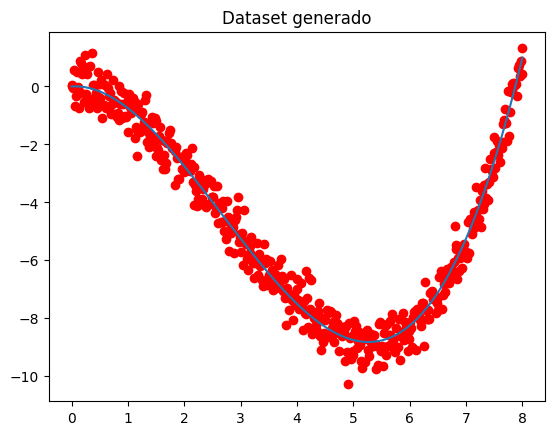

In [68]:
x_data = np.linspace(0,8,500) # datos en X
y_data = 0.125*x_data**3 - x_data**2 + 0.125*x_data  # polinomio con los datos (cúbico)
y_data2 = np.random.normal(0,0.50,500) + y_data
plt.scatter(x_data, y_data2, c='r', )
plt.plot(x_data, y_data) # graficar los datos
plt.title("Dataset generado")

Para la regresión con un polinomio, se necesita preprocesar los datos `x_data` para que modelen un polinomio del grado indicado. Esto es, crear la matriz A para resolver el problema de la forma $Ax = b$, las dimensiones de la matriz A son de $m\times m$ siendo m el grado del polinomio

**Ejercicio**: Variar el grado del polinomio. Los datos corresponden a un polinomio de tercer grado, Se puede apreciar que con grados inferiores los datos van a tener un mal ajuste y con grados superiores puede existir sobre entrenamiento, por ejemplo de grado 20 se empiezan a notar problemas de ajuste

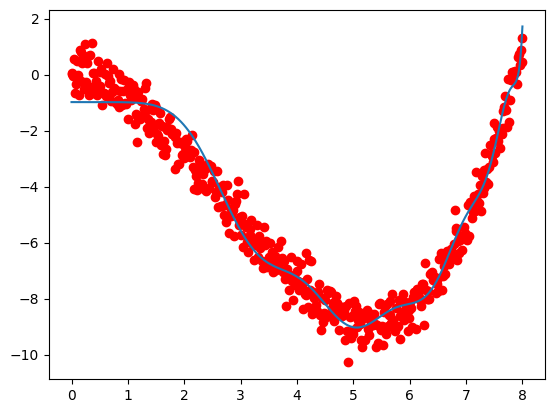

In [69]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=20)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)




Mean Squared Error: 7.408004606139401
Root Mean Squared Error: 2.6860688440295775
Mean Absolute Error: 2.2401277730297195
R^2: 0.2500481330617801


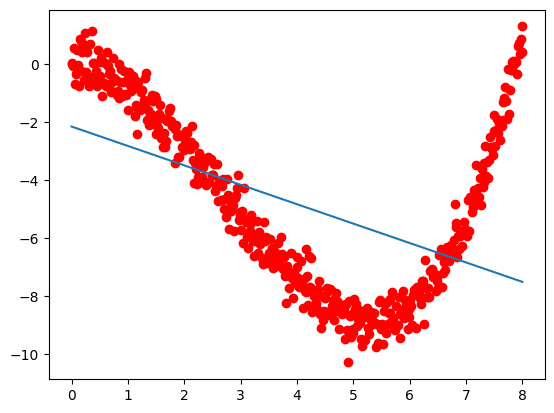

In [70]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=1)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

(array([ 10.,   8.,  13.,  14.,  68.,  88.,  68.,  85., 125.,  21.]),
 array([-8.81413979, -7.44719731, -6.08025482, -4.71331234, -3.34636985,
        -1.97942737, -0.61248489,  0.7544576 ,  2.12140008,  3.48834257,
         4.85528505]),
 <BarContainer object of 10 artists>)

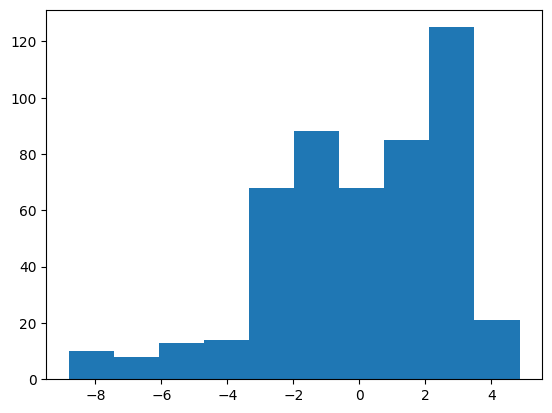

In [71]:
error =y_pred-y_data2 #y_test
plt.hist(error)

Mean Squared Error: 1.7246283886384481
Root Mean Squared Error: 1.3132510760088674
Mean Absolute Error: 1.1039970390341838
R^2: 0.8254066582569131


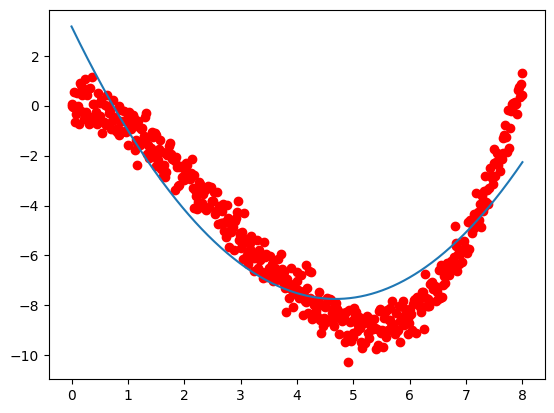

In [72]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=2)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data2)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 0.22830331513920585
Root Mean Squared Error: 0.47781096171938736
Mean Absolute Error: 0.38364097902738004
R^2: 0.9768876362097647


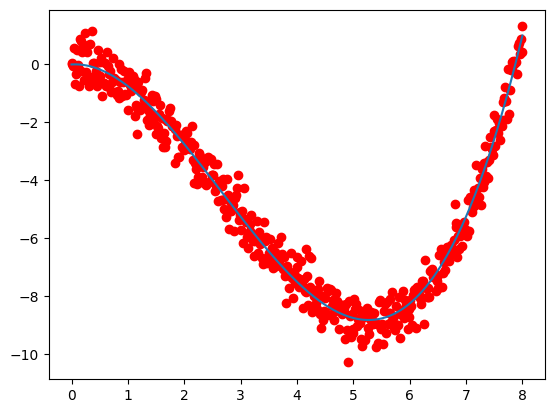

In [73]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=3)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 0.22389669804092027
Root Mean Squared Error: 0.47317723745011264
Mean Absolute Error: 0.3820721642066172
R^2: 0.9773337415910981


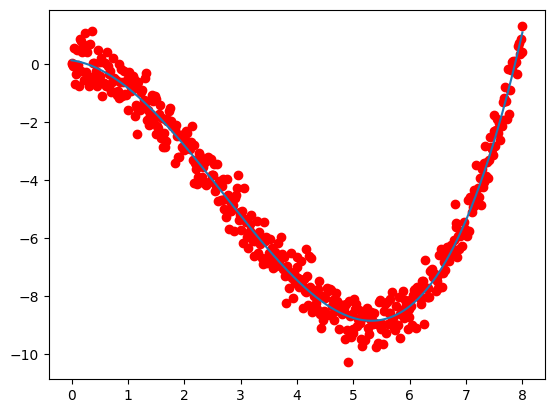

In [74]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=4)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data2)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 0.22830331513921068
Root Mean Squared Error: 0.4778109617193924
Mean Absolute Error: 0.3836409790273866
R^2: 0.9768876362097643


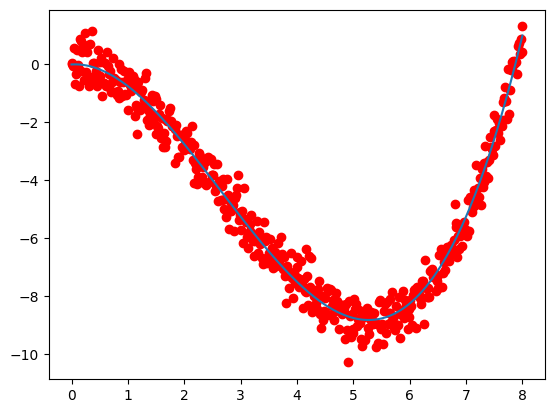

In [75]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=5)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 5.493540642797014e-25
Root Mean Squared Error: 7.411842309977333e-13
Mean Absolute Error: 6.732209493110104e-13
R^2: 1.0


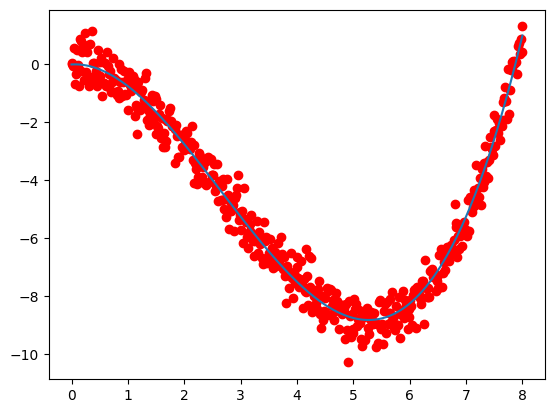

In [76]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=6)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data, y_pred))
print("R^2:",r2_score(y_data, y_pred))

Mean Squared Error: 0.22830331513874288
Root Mean Squared Error: 0.4778109617189029
Mean Absolute Error: 0.38364097902676514
R^2: 0.9768876362098117


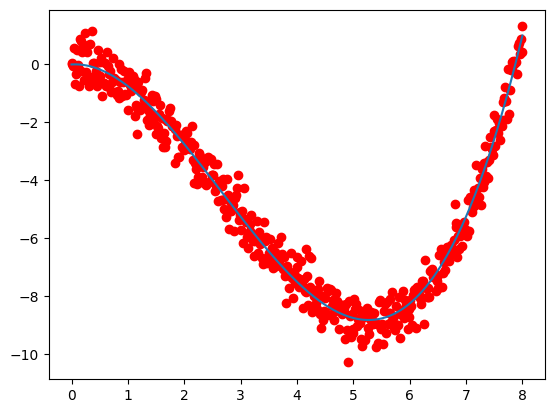

In [77]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=7)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 1.0654607348268511e-21
Root Mean Squared Error: 3.2641396030605845e-11
Mean Absolute Error: 2.7575643147832034e-11
R^2: 1.0


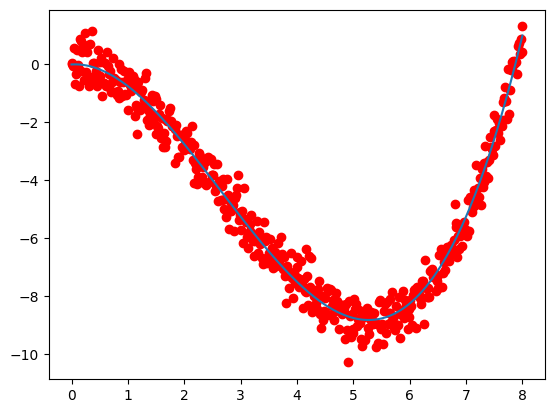

In [78]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=8)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data, y_pred))
print("R^2:",r2_score(y_data, y_pred))

(array([  7.,  11.,  45.,  93., 127.,  98.,  74.,  39.,   4.,   2.]),
 array([-1.42499896, -1.12352359, -0.82204823, -0.52057287, -0.21909751,
         0.08237785,  0.38385321,  0.68532857,  0.98680394,  1.2882793 ,
         1.58975466]),
 <BarContainer object of 10 artists>)

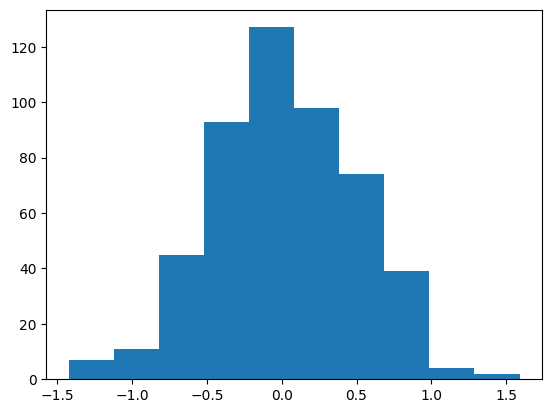

In [79]:
error =y_pred-y_data2 #y_test
plt.hist(error)

Mean Squared Error: 0.2283033151191898
Root Mean Squared Error: 0.4778109616984418
Mean Absolute Error: 0.3836409790098898
R^2: 0.9768876362117911


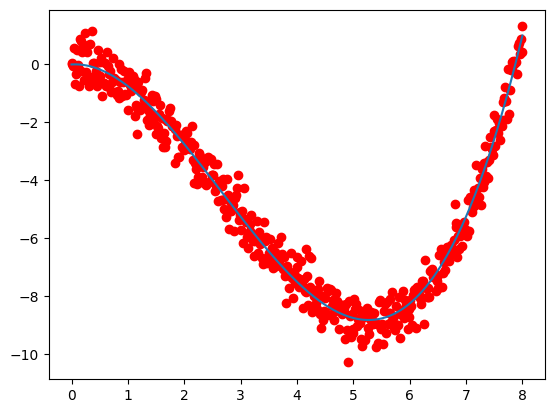

In [80]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=9)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 0.22830331506786072
Root Mean Squared Error: 0.477810961644729
Mean Absolute Error: 0.38364097890446147
R^2: 0.9768876362169874


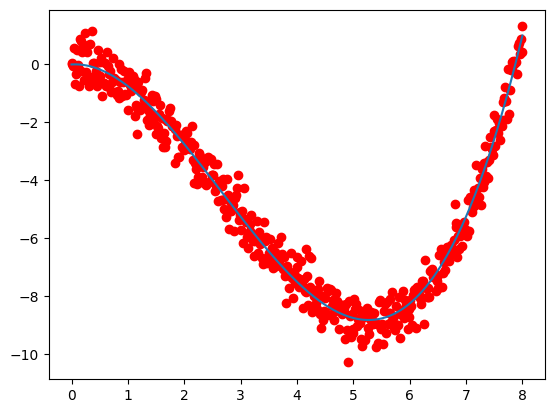

In [81]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=10)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 0.2283033191971483
Root Mean Squared Error: 0.4778109659657764
Mean Absolute Error: 0.383640987502395
R^2: 0.9768876357989575


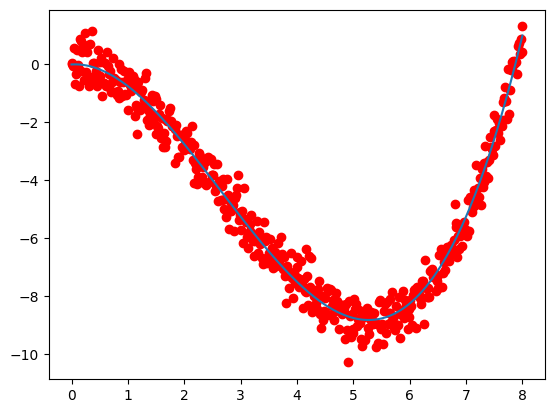

In [82]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=12)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 0.22830328727375065
Root Mean Squared Error: 0.4778109325598889
Mean Absolute Error: 0.3836409667385653
R^2: 0.9768876390307336


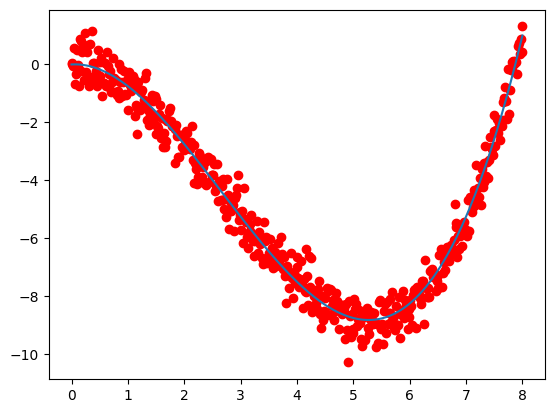

In [83]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=13)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 0.22830547983663624
Root Mean Squared Error: 0.4778132269377191
Mean Absolute Error: 0.3836408586027715
R^2: 0.9768874170658838


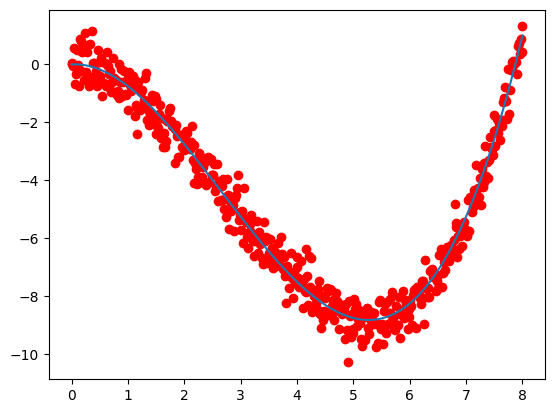

In [84]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=14)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 0.22832751962052095
Root Mean Squared Error: 0.47783628956005525
Mean Absolute Error: 0.3836449675632388
R^2: 0.976885185860863


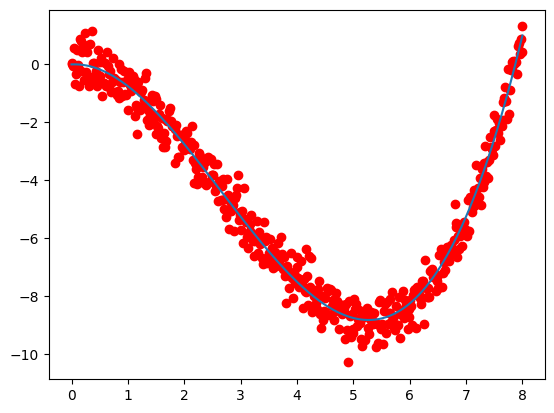

In [85]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=15)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 0.2283539382916269
Root Mean Squared Error: 0.47786393282149564
Mean Absolute Error: 0.3836506337100773
R^2: 0.9768825113577044


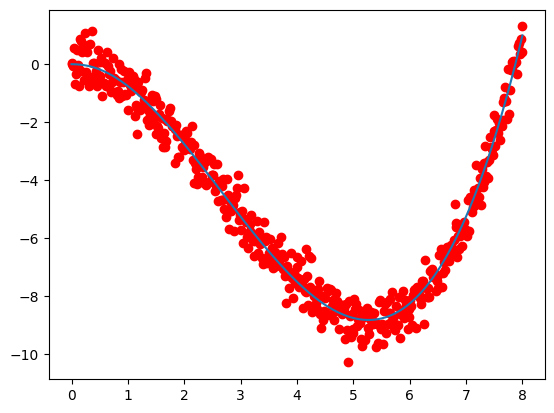

In [86]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=16)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 0.2289399708615054
Root Mean Squared Error: 0.4784767192471389
Mean Absolute Error: 0.3843267293068345
R^2: 0.9768231841510903


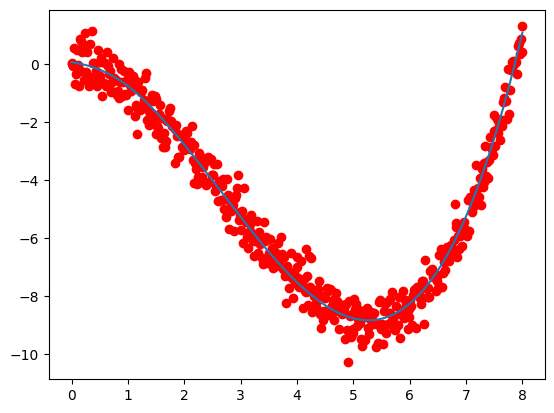

In [87]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=17)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 0.24178748423832622
Root Mean Squared Error: 0.49171890774946436
Mean Absolute Error: 0.3891685923228838
R^2: 0.9755225617629136


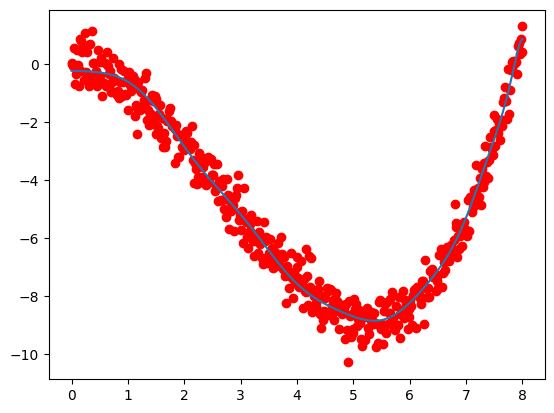

In [88]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=18)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 0.35265645117395333
Root Mean Squared Error: 0.5938488453924562
Mean Absolute Error: 0.4692086684239736
R^2: 0.9642987041710896


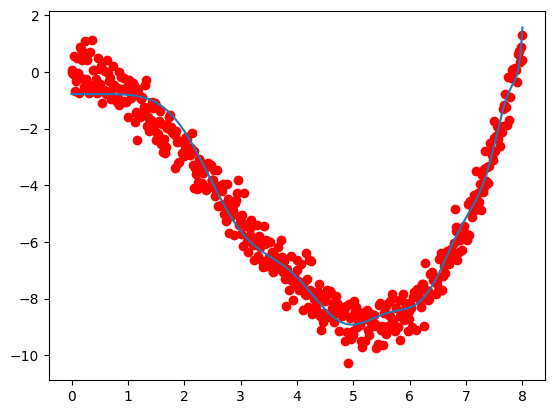

In [89]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=19)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 0.4298372425116141
Root Mean Squared Error: 0.6556197392632517
Mean Absolute Error: 0.519292651528296
R^2: 0.9564852804986099


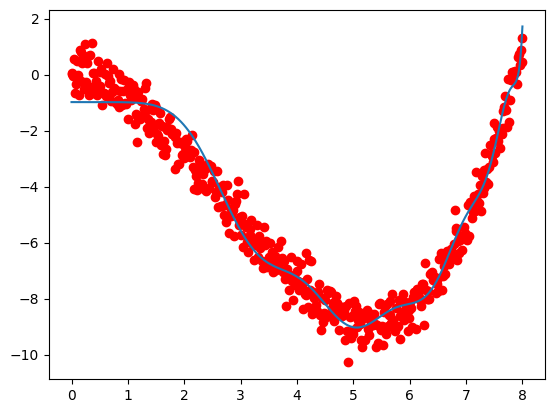

In [90]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=20)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 0.5337412853177697
Root Mean Squared Error: 0.730575995580042
Mean Absolute Error: 0.5801382074710765
R^2: 0.9459665193709068


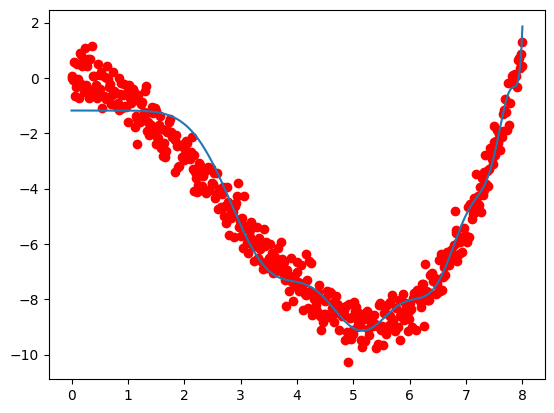

In [91]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=21)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 1.1118392267118586
Root Mean Squared Error: 1.0544378723812318
Mean Absolute Error: 0.8246811232084976
R^2: 0.8874425775712032


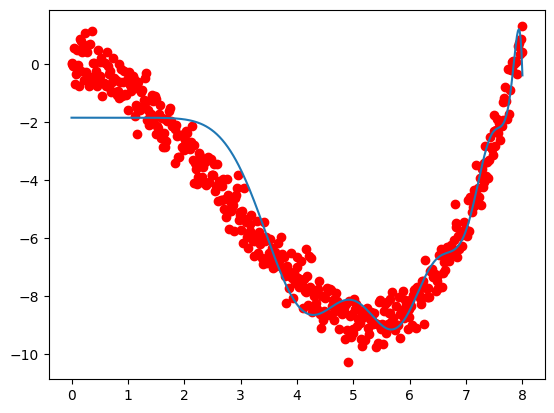

In [92]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=22)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 1.3393303299844987
Root Mean Squared Error: 1.1572944007401482
Mean Absolute Error: 0.9130532562999707
R^2: 0.8644124383256416


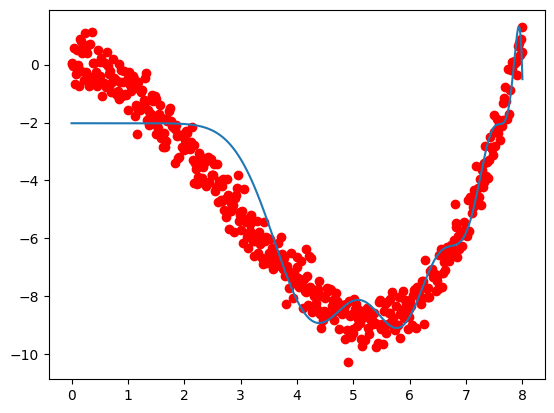

In [93]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=23)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 1.579181177790335
Root Mean Squared Error: 1.2566547568009023
Mean Absolute Error: 0.9985384656225428
R^2: 0.8401310561367552


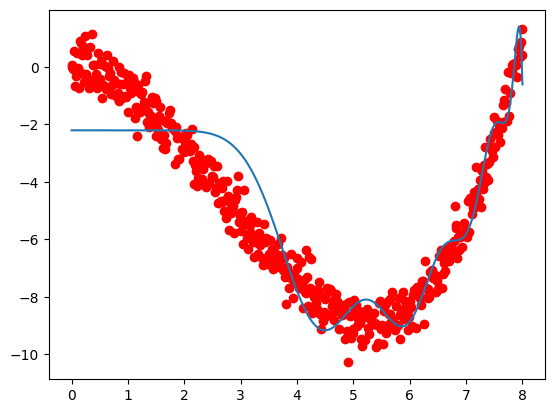

In [94]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=24)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 1.82404645543283
Root Mean Squared Error: 1.350572639820913
Mean Absolute Error: 1.0778087772064853
R^2: 0.8153420364371529


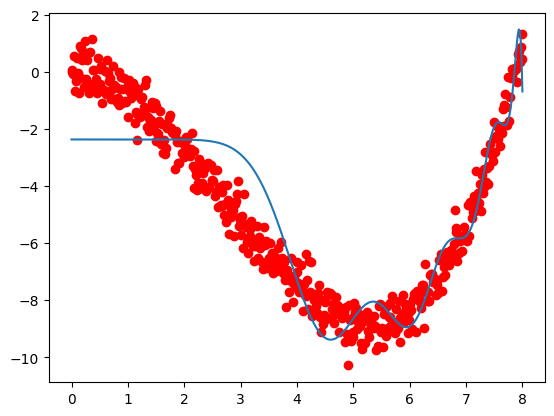

In [95]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=25)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 2.086183777677587
Root Mean Squared Error: 1.4443627583393261
Mean Absolute Error: 1.151436349326734
R^2: 0.7888044754252824


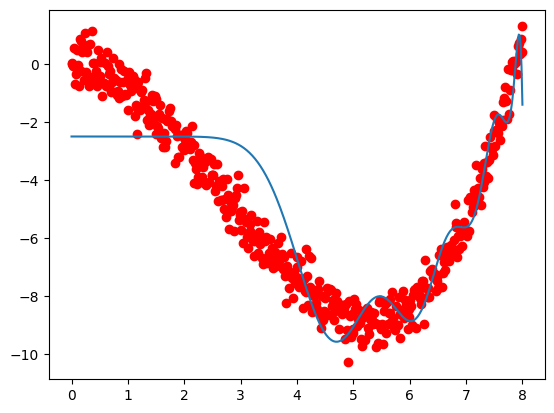

In [96]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=26)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 2.3506524170973475
Root Mean Squared Error: 1.5331837519023437
Mean Absolute Error: 1.2126077553472623
R^2: 0.7620309027259503


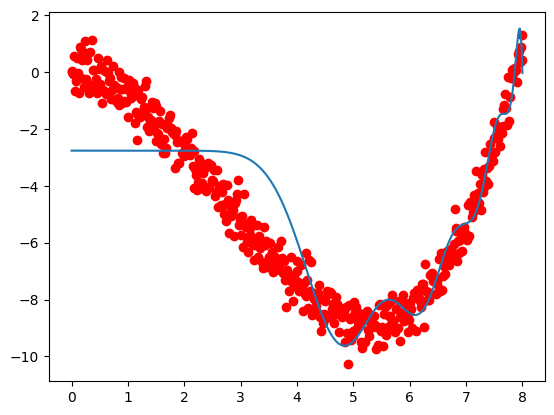

In [97]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=27)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 3.5167350666959574
Root Mean Squared Error: 1.8752959944222025
Mean Absolute Error: 1.5189107770376298
R^2: 0.6439821289244336


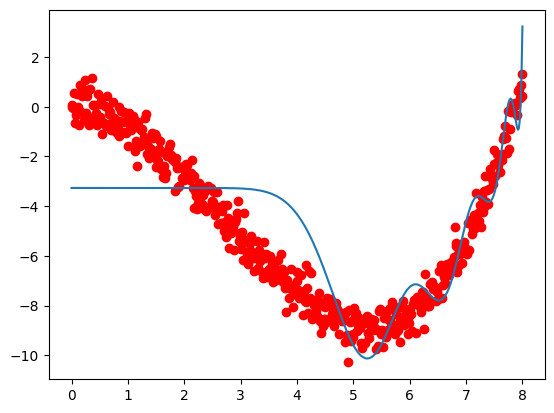

In [98]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=28)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 3.792586560288696
Root Mean Squared Error: 1.9474564334764195
Mean Absolute Error: 1.5798272372476954
R^2: 0.6160562091097885


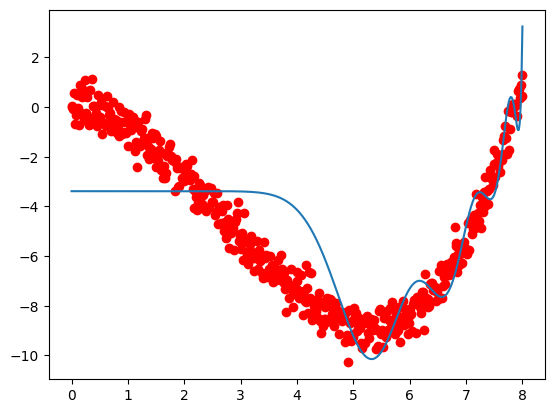

In [99]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=29)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))

Mean Squared Error: 4.061336615454194
Root Mean Squared Error: 2.015275816223227
Mean Absolute Error: 1.6364355400604493
R^2: 0.588849205830649


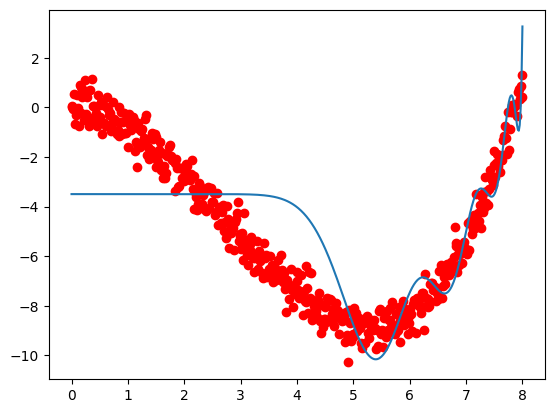

In [100]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=30)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data2, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data2, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data2, y_pred))
print("R^2:",r2_score(y_data2, y_pred))